In [1]:
import datetime as dt
import pandas_datareader.data as web
from matplotlib import style
import matplotlib.pyplot as plt
import math 
import numpy as np
import yfinance as yf
import pandas as pd
from scipy import optimize as scopti
import bs4 as bs
import pickle
import requests

In [2]:
import data
import risk_metrics as rm
import markowitz_construction as mc
import cppi_strategy_backtest as cppi

## Extracting S&P 500 Data & Caculating Statistics of all its Constituents

In [3]:
def spx_components():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker.rsplit(":")[-1].strip())
  
    return tickers

tickers_list=['^GSPC']+spx_components()
prices=data.data_pandas_reader_tenor(tickers_list,'2y','1d',field='Adj Close',)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
prices2=prices.dropna(axis=1)
gross_returns=mc.stock_returns(prices2)

In [5]:
risk_free_rate=data.data_pandas_reader_tenor(['^IRX'],'1y','1d',field='Adj Close')
returns_all=gross_returns.merge(risk_free_rate,how='left',left_index=True, right_index=True)
returns_all.fillna(method='bfill',inplace=True)
rf=gross_returns[gross_returns.columns[-1]]

[*********************100%***********************]  1 of 1 completed


In [6]:
summary=rm.summary_stats(gross_returns.drop(gross_returns.columns[0],axis=1), rf, 
                         period_freq=252).sort_values(by=['Sharpe Ratio','Max Drawdown'], ascending=False)

In [7]:
summary

,Annualized Return,Annualized Vol,Skewness,Excess Kurtosis,Cornish-Fisher VaR (5%),Gaussian VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
MRNA,2.557769,0.915086,0.542313,2.643951,0.075780,0.088048,0.115033,2.790569,-0.533882
ETSY,1.259671,0.651386,0.051885,3.291956,0.060017,0.063347,0.090460,1.930861,-0.492635
ENPH,1.638958,0.873248,0.865170,9.446573,0.060292,0.085056,0.111721,1.874334,-0.594009
GNRC,0.858725,0.483857,-0.065855,1.636776,0.046721,0.047159,0.066040,1.771353,-0.330877
FTNT,0.799517,0.460474,0.536896,9.311546,0.034890,0.044915,0.064071,1.732603,-0.376082
...,...,...,...,...,...,...,...,...,...
CCL,-0.351129,0.929163,-0.005123,8.758618,0.085901,0.096151,0.138149,-0.378470,-0.844643
VTRS,-0.161543,0.397721,0.016346,5.249536,0.038786,0.041554,0.057233,-0.408476,-0.458564
WU,-0.154693,0.356930,0.191263,3.630706,0.034479,0.037362,0.051655,-0.435898,-0.400329
LVS,-0.246312,0.507904,-0.044597,2.917259,0.051705,0.053183,0.069588,-0.486423,-0.532030


### Creating a Risky portfolio using Top 10 and Bottom 10 performers of S&P 500 over 2 years (MVE portfolio)

In [8]:
portfolio= summary.index[0:20].append(summary.index[-20:])

In [9]:
weight_gmv=mc.optimal_weights_for_gmv(gross_returns[portfolio], 252, short=True)
GMV_portfolio=prices2[portfolio].dot(weight_gmv)
GMV_rets=mc.stock_returns(GMV_portfolio)
weight_gmv

array([ 0.02748599,  0.03183009,  0.00806453, -0.02926809,  0.02648497,
       -0.08014802,  0.34223667,  0.07625671, -0.04660161, -0.01509849,
       -0.0372761 , -0.08007496,  0.14959521,  0.0738109 ,  0.17076101,
       -0.04241935,  0.05065118, -0.03298913, -0.07236593,  0.09013218,
        0.06251387,  0.0510422 , -0.00392034,  0.02195554,  0.0421959 ,
        0.08609931, -0.00828685,  0.00400178,  0.01375978,  0.04563305,
       -0.08613658, -0.08370253, -0.10227363,  0.07380098,  0.00870612,
       -0.02352271,  0.0753536 ,  0.05134244,  0.06408704,  0.09628327])

In [10]:
weight_mve=mc.optimal_weights_for_max_sharpe_ratio(rf, gross_returns[portfolio], 252,short=True)
MVE_portfolio=prices2[portfolio].dot(weight_mve)
MVE_rets=mc.stock_returns(MVE_portfolio)
weight_mve

C:\Users\hp\Github Imperial_MFE\markowitz_construction.py:28: RuntimeWarning: invalid value encountered in double_scalars
  return((1+returns).product())**(period_freq/returns.shape[0])-1


array([ 1.        ,  0.41682788,  0.82987369,  0.90084154,  0.07463617,
        1.        ,  0.4508948 ,  0.78791056, -0.52540029,  1.        ,
        1.        ,  0.51164838, -0.80252837,  1.        ,  1.        ,
        1.        ,  1.        , -0.40281121,  0.30557146,  0.21127114,
       -0.24483456,  0.626635  , -0.03762532, -0.63207984, -1.        ,
       -1.        ,  0.97618809,  0.47583797, -0.28790311, -1.        ,
       -1.        , -1.        , -1.        , -1.        , -0.56526127,
        0.93030797, -1.        , -1.        , -1.        , -1.        ])

In [11]:
concat_rets=pd.concat([GMV_rets, MVE_rets], axis=1)
concat_rets.columns=['GMV', 'MVE']
rm.summary_stats(concat_rets, rf,period_freq=252)

,Annualized Return,Annualized Vol,Skewness,Excess Kurtosis,Cornish-Fisher VaR (5%),Gaussian VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
GMV,0.443534,0.229103,-0.172405,4.206738,0.021628,0.022153,0.033826,1.929493,-0.191466
MVE,0.856894,0.321524,-0.222872,3.756075,0.030347,0.030618,0.045969,2.659518,-0.239528


In [12]:
risky_portfolio= MVE_rets

### Creating a safe portfolio using US Treasury Bond ETFs

In [13]:
safe_assets=data.data_pandas_reader_tenor(['IEF', 'TIP', 'AGG'],'1y','1d',field='Adj Close')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
gross_returns=mc.stock_returns(safe_assets.dropna(axis=1))

In [15]:
returns_all=pd.DataFrame(rf).merge(gross_returns,how='left',left_index=True, right_index=True)
returns_all.fillna(method='bfill',inplace=True)
returns_all.drop(returns_all.columns[0],axis=1,inplace=True)

In [16]:
rm.summary_stats(returns_all, rf, 
                         period_freq=252).sort_values(by=['Sharpe Ratio','Max Drawdown'], ascending=False)

,Annualized Return,Annualized Vol,Skewness,Excess Kurtosis,Cornish-Fisher VaR (5%),Gaussian VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
TIP,0.121701,0.032863,-0.790469,7.845644,0.003057,0.002944,0.005081,3.661887,-0.029894
AGG,0.013995,0.025236,-0.365869,5.659697,0.002536,0.002556,0.004057,0.505779,-0.037200
IEF,-0.004346,0.037274,-0.108497,5.424598,0.003688,0.003873,0.005751,-0.149010,-0.057571


In [17]:
weight_mve=mc.optimal_weights_for_max_sharpe_ratio(rf, returns_all, 252, short=True)
MVE_rets=pd.Series(mc.portfolio_returns(weight_mve, returns_all), index=returns_all.index)

In [18]:
safer_portfolio=MVE_rets

### Backtesting CPPI Strategy using both Static and Dynamic Floors (using drawdown as Risk Measure)   

In [134]:
backtest_results=cppi.run_cppi(risky_portfolio,risk_free_rate=None,safe_r=safer_portfolio,
                               m=4, start=1, floor=0.8, drawdown=None,period_freq=252)
backtest_results3=cppi.run_cppi(risky_portfolio,risk_free_rate=None,safe_r=safer_portfolio,
                               m=6, start=1, floor=0.8, drawdown=None,period_freq=252)
backtest_results2=cppi.run_cppi(risky_portfolio,risk_free_rate=None,safe_r=safer_portfolio,
                                m=4, start=1, floor=0.8, drawdown=0.15,period_freq=252)
backtest_results4=cppi.run_cppi(risky_portfolio,risk_free_rate=None,safe_r=safer_portfolio,
                                m=4, start=1, floor=0.8, drawdown=0.2,period_freq=252)

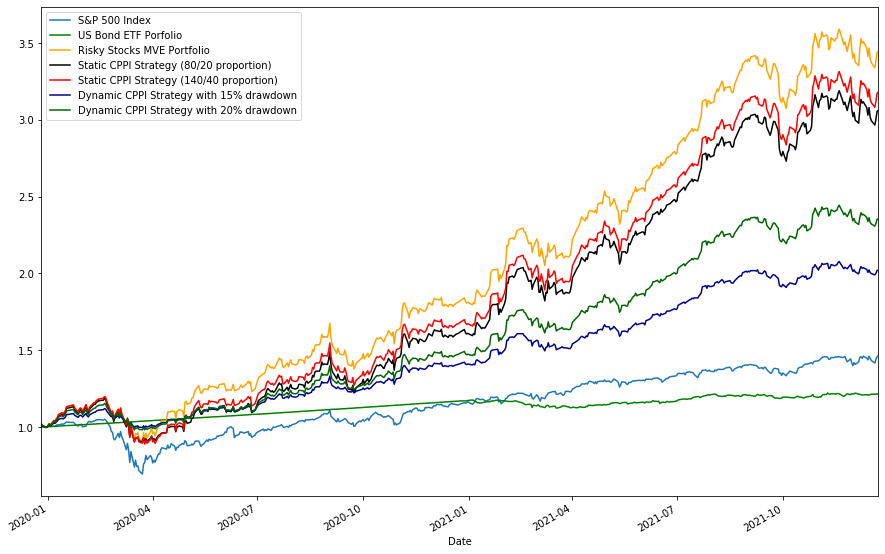

In [135]:
SPX_rets=mc.stock_returns(prices2['^GSPC'])
ax=mc.cumulative_returns(SPX_rets).plot.line(x="Date", y="Cumulative Returns",figsize=(15,10), 
                                                                label='S&P 500 Index')
ax.plot(mc.cumulative_returns(safer_portfolio),color='green', label='US Bond ETF Porfolio')
ax.plot(mc.cumulative_returns(risky_portfolio),color='orange', label='Risky Stocks MVE Portfolio')
ax.plot(backtest_results['Wealth'],color='black', label='Static CPPI Strategy (80/20 proportion)')
ax.plot(backtest_results3['Wealth'],color='red', label='Static CPPI Strategy (140/40 proportion)')
ax.plot(backtest_results2['Wealth'],color='darkblue', label='Dynamic CPPI Strategy with 15% drawdown')
ax.plot(backtest_results4['Wealth'],color='darkgreen', label='Dynamic CPPI Strategy with 20% drawdown')
plt.legend()


In [143]:
portfolio_rets=pd.concat([mc.stock_returns(prices2['^GSPC']),risky_portfolio, safer_portfolio,
                          mc.stock_returns(backtest_results['Wealth']),
                          mc.stock_returns(backtest_results3['Wealth']),
                         mc.stock_returns(backtest_results2['Wealth']),
                         mc.stock_returns(backtest_results4['Wealth'])], axis=1)
portfolio_rets.columns=['S&P 500 Index','Risky Portfolio', 'Safer Portfolio','Static CPPI (80/20)',
                        'Static CPPI (140/40)','Dynamic CPPI 15%','Dynamic CPPI 20%']
rm.summary_stats(portfolio_rets, rf,period_freq=252).sort_values(by=['Max Drawdown','Annualized Return','Annualized Vol'])

,Annualized Return,Annualized Vol,Skewness,Excess Kurtosis,Cornish-Fisher VaR (5%),Gaussian VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
S&P 500 Index,0.210825,0.260560,-0.663894,13.600187,0.024535,0.026076,0.041332,0.804642,-0.339250
Static CPPI (140/40),0.765458,0.310347,-0.420363,3.661505,0.030497,0.029671,NaN,2.460874,-0.258352
Risky Portfolio,0.856894,0.321524,-0.222872,3.756075,0.030347,0.030618,0.045969,2.659518,-0.239528
Static CPPI (80/20),0.735405,0.288079,-0.451309,1.832104,0.029047,0.027461,NaN,2.546701,-0.238856
Dynamic CPPI 20%,0.521694,0.196365,-0.360178,1.410750,0.019462,0.018579,NaN,2.648336,-0.149231
Dynamic CPPI 15%,0.412208,0.150037,-0.345381,1.392816,0.014753,0.014113,NaN,2.736870,-0.110658
Safer Portfolio,0.101436,0.042451,-0.846467,7.162411,0.004228,0.004007,0.006713,2.358052,-0.044941
